SISTEM REKOMENDASI FILM

DATASET: https://www.kaggle.com/datasets/abdallahwagih/movies

# Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [3]:
!pip install numpy==1.24.3

# load data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/SPK/DBS/rekomendasi/movies.csv')
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

load data dengan jumlah data 4803 dan 24 kolom

# Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

Dataset tersebut berisi 4.803 entri film dengan 24 kolom yang mencakup informasi seperti *title*, *genres*, *overview*, *cast*, *director*, *budget*, *revenue*, dan lainnya. Beberapa kolom memiliki data yang tidak lengkap, seperti `genres`, `tagline`, dan `cast`, yang perlu dipertimbangkan saat membangun model rekomendasi atau analisis data lainnya.


In [6]:
print(f'Jumlah missing value: {df.isnull().sum()}')

Jumlah missing value: index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64


  - Kolom homepage memiliki jumlah missing value paling banyak yaitu 3091, ini karena tidak semua film memiliki halaman resmi.
    - Beberapa kolom seperti genres, keywords, tagline, cast, dan director juga memiliki missing value yang cukup signifikan, perlu dipertimbangkan saat analisis.
    - Kolom penting seperti budget, revenue, vote_average, dan title tidak memiliki missing value, sehingga data utama terkait performa film relatif lengkap.
    - Data missing di kolom seperti runtime 2 dan release_date 1 sangat sedikit, tagline memiliki 844, cast 43, direktur 30,genres 28, dan keyword 412

In [7]:
print(f'Jumlah baris duplikat: {df.duplicated().sum()}')

Jumlah baris duplikat: 0


Hasil pemeriksaan menunjukkan bahwa tidak terdapat duplikat data pada seluruh baris dataset, yang berarti setiap rekaman film adalah unik dan tidak berulang.

In [8]:
df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


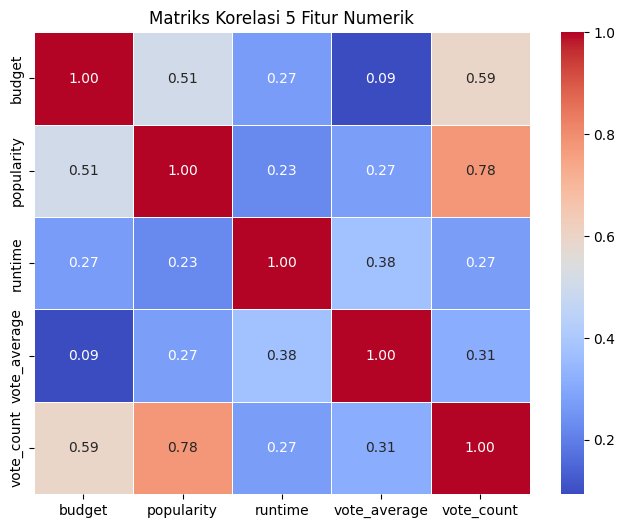

In [9]:
# Define the list of numerical columns
selected_features = ['budget', 'popularity', 'runtime','vote_average', 'vote_count']

# Matriks korelasi
corr_matrix = df[selected_features].corr()

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriks Korelasi 5 Fitur Numerik")
plt.show()

- Tidak ada korelasi negatif yang signifikan di sini.

- Korelasi tertinggi adalah antara popularity dan vote_count (0.78).

- Korelasi terlemah adalah antara vote_average dan budget (0.09) → menunjukkan bahwa anggaran besar tidak menjamin film mendapat rating tinggi.

# Data Preparation

In [10]:
mid = df['id'].tolist()
movie_name = df['title'].tolist()
movie_genre = df['genres'].tolist()

# Create the new DataFrame using the extracted lists
movie_new = pd.DataFrame({
    'id': mid,
    'movie_name': movie_name,
    'genre': movie_genre
})
movie_new

,id,movie_name,genre
0,19995,Avatar,Action Adventure Fantasy Science Fiction
1,285,Pirates of the Caribbean: At World's End,Adventure Fantasy Action
2,206647,Spectre,Action Adventure Crime
3,49026,The Dark Knight Rises,Action Crime Drama Thriller
4,49529,John Carter,Action Adventure Science Fiction
...,...,...,...
4798,9367,El Mariachi,Action Crime Thriller
4799,72766,Newlyweds,Comedy Romance
4800,231617,"Signed, Sealed, Delivered",Comedy Drama Romance TV Movie
4801,126186,Shanghai Calling,NaN


Membuat sebuah DataFrame baru bernama movie_new yang hanya berisi tiga kolom penting (id, movie_name, dan genre) dari DataFrame asli df. Tujuannya adalah untuk menyederhanakan data agar bisa digunakan lebih mudah untuk keperluan seperti sistem rekomendasi berbasis konten (Content-Based Filtering / CBF).

In [11]:
movie_new = movie_new.dropna()
print(f'Jumlah missing value setelah dihapus: {movie_new.isnull().sum()}')

Jumlah missing value setelah dihapus: id            0
movie_name    0
genre         0
dtype: int64


ketika dicek sudah tidak ada missing value lagi

In [12]:
movie_new.shape

(4775, 3)

jumlah data dan kolom setelah dihapus adalah 4775 baris dan 3 kolom

In [13]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

tf.fit(movie_new['genre'])

tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'fiction', 'foreign',
       'history', 'horror', 'movie', 'music', 'mystery', 'romance',
       'science', 'thriller', 'tv', 'war', 'western'], dtype=object)

mengubah data genre film menjadi representasi numerik agar bisa digunakan dalam perhitungan kemiripan antar film (Content-Based Filtering)

In [14]:
tfidf_matrix = tf.fit_transform(movie_new['genre'])
tfidf_matrix.shape

(4775, 22)

Kode tersebut mengubah teks genre menjadi matriks TF-IDF berdimensi (jumlah film, jumlah kata unik), yang merepresentasikan seberapa penting setiap kata genre bagi masing-masing film.

In [15]:
tfidf_matrix.todense()

matrix([[0.35720336, 0.41294389, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.47952865, 0.55435768, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.51322729, 0.5933149 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.66381329, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

mengubah matriks TF-IDF yang awalnya berbentuk sparse (jarang) menjadi bentuk dense (penuh), yaitu array 2D berisi nilai bobot TF-IDF untuk setiap genre di setiap film. Hasilnya bisa sangat besar tergantung jumlah film dan jumlah fitur unik.

In [16]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=movie_new.movie_name
).sample(22, axis=1).sample(10, axis=0)

,horror,science,war,fiction,thriller,mystery,crime,movie,foreign,drama,...,family,comedy,western,fantasy,action,history,documentary,animation,tv,romance
movie_name,,,,,,,,,,,,,,,,,,,,,
Drive Me Crazy,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.348275,...,0.650663,0.406196,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.538838
Contact,0.000000,0.528865,0.0,0.528865,0.000000,0.598776,0.000000,0.0,0.0,0.286481,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Shanghai Noon,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.306058,0.769398,0.000000,0.366803,0.0,0.0,0.0,0.0,0.000000
The Haunting,0.504465,0.000000,0.0,0.000000,0.365703,0.567435,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.538325,0.000000,0.0,0.0,0.0,0.0,0.000000
Another Earth,0.000000,0.660325,0.0,0.660325,0.000000,0.000000,0.000000,0.0,0.0,0.357691,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
District 9,0.000000,0.707107,0.0,0.707107,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Frequency,0.000000,0.522501,0.0,0.522501,0.381258,0.000000,0.478037,0.0,0.0,0.283034,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Scream 2,0.664422,0.000000,0.0,0.000000,0.000000,0.747358,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
A Hard Day's Night,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.428665,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


untuk melihat sebagian kecil dari matriks TF-IDF dengan lebih mudah dan cepat. Ini berguna sebagai inspeksi data sebelum melanjutkan ke tahap perhitungan kesamaan (similarity).

# Content-Based Filtering (CBF)

In [17]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.74490515, 0.42833228, ..., 0.        , 0.        ,
        0.        ],
       [0.74490515, 1.        , 0.57501586, ..., 0.        , 0.        ,
        0.        ],
       [0.42833228, 0.57501586, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.30616097,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.30616097, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

cosine_sim ini nantinya bisa digunakan untuk merekomendasikan film yang memiliki genre mirip dengan film tertentu.

In [18]:

cosine_sim_df = pd.DataFrame(cosine_sim, index=movie_new['movie_name'], columns=movie_new['movie_name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (4775, 4775)


movie_name,Halloween 4: The Return of Michael Myers,GirlHouse,Black Water Transit,Cop Out,Moliere
movie_name,,,,,
Don Jon,0.000000,0.000000,0.233664,0.251229,1.000000
The Empire Strikes Back,0.000000,0.000000,0.000000,0.233221,0.000000
Not Easily Broken,0.000000,0.000000,0.276556,0.000000,0.844907
Grown Ups 2,0.000000,0.000000,0.000000,0.469662,0.534914
Everything Put Together,0.000000,0.000000,0.509472,0.000000,0.458639
Batman Begins,0.000000,0.000000,0.814561,0.803234,0.190333
Cop Land,0.000000,0.000000,0.814561,0.803234,0.190333
The Station Agent,0.000000,0.000000,0.331619,0.356547,0.704615
End of Watch,0.332113,0.332113,0.824511,0.482544,0.192658


 membuat DataFrame matriks kemiripan film dengan indeks dan kolom berupa judul film, baris kedua mencetak ukuran matriks, dan baris ketiga menampilkan sampel acak sebagian kolom dan baris dari matriks tersebut.

In [19]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=movie_new[['movie_name', 'genre']], k=5):


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_movie agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movie, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Fungsi ini mengambil film yang paling mirip dengan nama_movie berdasarkan matriks kemiripan, menghapus film itu sendiri dari hasil, lalu mengembalikan k film teratas beserta detail judul dan genrenya.

In [20]:
movie_new[movie_new.movie_name.eq('Avatar')]

,id,movie_name,genre
0,19995,Avatar,Action Adventure Fantasy Science Fiction


check genre film mau yang diuji

In [21]:
movie_recommendations('Avatar')

,movie_name,genre
0,Man of Steel,Action Adventure Fantasy Science Fiction
1,The Wolverine,Action Science Fiction Adventure Fantasy
2,Superman Returns,Adventure Fantasy Action Science Fiction
3,Jupiter Ascending,Science Fiction Fantasy Action Adventure
4,Beastmaster 2: Through the Portal of Time,Action Adventure Fantasy Science Fiction


# Evaluasi

In [22]:
def hitung_presisi(rekomendasi_df, movie_input, items=movie_new[['movie_name', 'genre']]):
    # Ambil genre film yang menjadi input (misal 'Avatar')
    genre_input = items[items['movie_name'] == movie_input]['genre'].values[0]

    # Ambil daftar genre dari film-film hasil rekomendasi
    rekom_genres = rekomendasi_df['genre'].tolist()

    # Hitung berapa banyak film rekomendasi yang genre-nya sama persis dengan genre input
    relevan = sum([genre_input == g for g in rekom_genres])

    # Hitung total jumlah film yang direkomendasikan
    total_rekom = len(rekom_genres)

    # Hitung presisi: rasio rekomendasi relevan terhadap total rekomendasi
    presisi = relevan / total_rekom if total_rekom > 0 else 0

    # Kembalikan nilai presisi
    return presisi


# Contoh pemakaian fungsi
if 'Avatar' in cosine_sim_df.index:
    # Ambil 5 rekomendasi untuk film 'Avatar'
    rekom = movie_recommendations('Avatar', similarity_data=cosine_sim_df, items=movie_new[['movie_name', 'genre']], k=5)

    # Hitung presisi rekomendasi tersebut
    presisi = hitung_presisi(rekom, 'Avatar')

    # Tampilkan hasil rekomendasi dan nilai presisinya
    print("Rekomendasi Avatar dengan genre Action Adventure Fantasy Science Fiction:")
    print(rekom)
    print(f"Presisi: {presisi:.2f}")
else:
    # Jika film 'Avatar' tidak ada di data, tampilkan pesan ini
    print("Movie 'Avatar' tidak ditemukan di data.")

Rekomendasi Avatar dengan genre Action Adventure Fantasy Science Fiction:
                                  movie_name  \
0                               Man of Steel   
1                              The Wolverine   
2                           Superman Returns   
3                          Jupiter Ascending   
4  Beastmaster 2: Through the Portal of Time   

                                      genre  
0  Action Adventure Fantasy Science Fiction  
1  Action Science Fiction Adventure Fantasy  
2  Adventure Fantasy Action Science Fiction  
3  Science Fiction Fantasy Action Adventure  
4  Action Adventure Fantasy Science Fiction  
Presisi: 0.40


Hasil rekomendasi untuk film "Avatar" menunjukkan lima film yang direkomendasikan dengan genre yang sangat mirip, yakni kombinasi genre Action, Adventure, Fantasy, dan Science Fiction. Dari lima film tersebut, hanya dua film yang memiliki genre yang persis sama dengan genre film "Avatar," sehingga menghasilkan nilai presisi sebesar 0.40 atau 40%. Ini berarti 40% dari rekomendasi yang diberikan benar-benar relevan berdasarkan kesamaan genre secara tepat, sedangkan sisanya memiliki perbedaan urutan atau kombinasi genre meskipun masih serupa